# *Pre-processing and Feature Extraction*

In [1]:
from utility.preProcessor import *
from utility.featureExtractor import *
from utility.seizureClassifier import *

2025-08-18 01:43:47.432959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-18 01:43:47.433008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-18 01:43:47.433949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 01:43:47.438808: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-18 01:43:48.020883: W tensorflow/compiler/tf2

In [2]:
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from tqdm import tqdm

# # Processing function with dependency preserved
# def process_folder(data_path, folder):
#     data_dir = os.path.join(data_path, folder)
#     print(f"Processing: {data_dir}")
    
#     # Perform dependent operations
#     chb_mit_edf_to_csv(data_dir)
#     summary_file = os.path.join(data_dir, f"{folder}-summary.txt")
#     summary_data = chb_mit_parse_summary(summary_file)
#     chb_mit_add_class_to_csv(data_dir, summary_data)


# data_path = os.path.abspath('./dataset/chb-mit-scalp')
# folders = os.listdir(data_path)

# # Use ProcessPoolExecutor and track progress
# with ProcessPoolExecutor() as executor:
#     futures = {executor.submit(process_folder, data_path, folder): folder for folder in folders}

#     # Display progress
#     for future in tqdm(as_completed(futures), total=len(folders), desc="Processing Folders"):
#         try:
#             future.result()  # Raise any exceptions that occurred
#         except Exception as e:
#             print(f"Error processing {futures[future]}: {e}")


In [3]:
# import os
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# data_path = './dataset/chb-mit-scalp/'
# part_list = sorted(os.listdir(data_path))
# freq = 256.0


# for part_id in tqdm(part_list, desc=f'{data_path} parts'):
#     data_dir = data_path + part_id + '/'
#     part_file_list = sorted([file for file in os.listdir(data_dir) if "_classed" in file])
    
#     for file in tqdm(part_file_list, desc=f'{part_id} Files'):
#         # Load only the specified columns
#         df = pd.read_csv(data_dir + file, index_col=None)
        
#         # Remove rows with NaN values
#         df = df.dropna()
#         df = df.drop(columns=['Time'])
#         df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#         # Extract seizure data
#         df_seizure = df[df['Class'] == 1]
#         df_base = df[df['Class'] != 1]

#         feat = Seizure_Features(
#             sf=freq,
#             window_size=None,
#             bandpasses=[[2, 4], [4, 8], [8, 12], [12, 30], [30, 70]],
#             feature_list=[
#                 'power', 'mean', 'std', 'ratio', 
#                 'LSWT', 'fft_corr', 'fft_eigen', 'time_corr', 'time_eigen'
#             ]
#         )

#         part_x_feat_base = feat.transform(df_base.values, channel_names_list=list(df_base.columns))
#         part_x_feat_base = pd.DataFrame(part_x_feat_base, columns=feat.feature_names)

#         writeDumpFile(f'./dataset/chb-mit-scalp/{part_id}/feature_mix.h5', part_id, part_x_feat_base, np.expand_dims(np.array([0]), axis=1))
        
#         if not df_seizure.empty:
#             part_x_feat_seizure = feat.transform(df_seizure.values, channel_names_list=list(df_seizure.columns))
#             part_x_feat_seizure = pd.DataFrame(part_x_feat_seizure, columns=feat.feature_names)
#             writeDumpFile(f'./dataset/chb-mit-scalp/{part_id}/feature_mix.h5', part_id, part_x_feat_seizure, np.expand_dims(np.array([1]), axis=1))
#         break
    
    

In [4]:
# import os
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# data_path = './dataset/chb-mit-scalp/'
# part_list = sorted(os.listdir(data_path))
# freq = 256.0
# window_size = 256  # 1-second window (adjust based on frequency)

# for part_id in tqdm(part_list, desc=f'{data_path} parts'):
#     data_dir = data_path + part_id + '/'
#     part_file_list = sorted([file for file in os.listdir(data_dir) if "_classed" in file])
    
#     for file in tqdm(part_file_list, desc=f'{part_id} Files'):
#         # Load and clean data
#         df = pd.read_csv(data_dir + file, index_col=None).dropna()
#         df = df.drop(columns=['Time'], errors='ignore')
#         df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#         # Split into seizure and non-seizure data
#         df_seizure = df[df['Class'] == 1]
#         df_base = df[df['Class'] != 1]

#         # Define a function to create windows
#         def create_windows(data, class_label):
#             rows = []
#             for i in range(0, len(data) - window_size + 1, window_size):
#                 window = data.iloc[i:i + window_size].values
#                 rows.append((window, class_label))
#             return rows

#         # Create windows for both seizure and base data
#         rows = []
#         if not df_base.empty:
#             rows.extend(create_windows(df_base, 0))
#         if not df_seizure.empty:
#             rows.extend(create_windows(df_seizure, 1))

#         # Extract features for all windows
#         all_features = []
#         all_labels = []
#         for window, label in rows:
#             feat = Seizure_Features(
#                 sf=freq,
#                 window_size=None,
#                 bandpasses=[[2, 4], [4, 8], [8, 12], [12, 30], [30, 70]],
#                 feature_list=['power', 'mean', 'std']
#             )
#             transformed = feat.transform(window, channel_names_list=list(df.columns))
#             all_features.append(transformed)
#             all_labels.append(label)

#         # Combine all features and labels into a DataFrame
#         feature_df = pd.DataFrame(np.vstack(all_features), columns=feat.feature_names)
#         label_df = pd.DataFrame(all_labels, columns=['Class'])

#         # Write to file (append mode)
#         feature_df['Class'] = label_df
#         writeDumpFile(
#             f'./dataset/chb-mit-scalp/{part_id}/feature_mix.h5',
#             part_id,
#             feature_df,
#             np.expand_dims(np.array(all_labels), axis=1)
#         )
#     break

In [5]:
# data_path = './dataset/chb-mit-scalp/'
# part_list = sorted(os.listdir(data_path))

# for part_id in tqdm(part_list, desc=f'{data_path} parts'):
#     try:
#         dumpFilePath = f'./dataset/chb-mit-scalp/{part_id}/feature_mix.h5'
#         h5file = tables.open_file(dumpFilePath, mode="r+")
#         data_x = h5file.get_node(f'/{part_id}/Data_x')
#         data_y = h5file.get_node(f'/{part_id}/Data_y')
#         data_x_labels = h5file.get_node(f'/{part_id}/Data_x_Feat_Names')
#         part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
#         print(part_feature_df)
#         part_feature_df['Class'] = data_y[:]
#         part_feature_df = part_feature_df.set_index('Class')
#         print(f'Class Count {part_feature_df.index.value_counts()}')
#         part_feature_df.to_csv(re.sub('.h5', '_feats.csv', dumpFilePath))
#         h5file.close()
#     except Exception as e:
#         print(f'Error: {e}')
        
#     break




In [6]:
# import os
# import pandas as pd
# from tqdm import tqdm

# data_path = './dataset/chb-mit-scalp/'
# part_list = sorted(os.listdir(data_path))

# # Initialize an empty DataFrame to store the cumulative data
# cumulative_df = pd.DataFrame()

# for part_id in tqdm(part_list, desc=f'{data_path} parts'):
#     try:
#         # Read the DataFrame
#         df = pd.read_csv(f'./dataset/chb-mit-scalp/{part_id}/feature_mix_feats.csv', index_col=None)
        
#         # If cumulative_df is empty, initialize it with the current DataFrame
#         if cumulative_df.empty:
#             cumulative_df = df
#         else:
#             # Find the common columns between the cumulative DataFrame and the current DataFrame
#             common_columns = cumulative_df.columns.intersection(df.columns)
            
#             # Concatenate the DataFrame with the common columns to the cumulative DataFrame
#             cumulative_df = pd.concat([cumulative_df[common_columns], df[common_columns]], ignore_index=True)
#     except Exception as e:
#         print(f'Error processing {part_id}: {e}')

# # Save the cumulative DataFrame to a CSV file
# cumulative_df.to_csv('./dataset/chb-mit-scalp/cumulative_combined_mix_feats.csv', index=False)

In [7]:
df = pd.read_csv('./dataset/chb-mit-scalp/cumulative_combined_mix_feats.csv', index_col=None)
df.columns = df.columns.str.replace('Unnamed: ', '')
df.columns = df.columns.str.replace('Class', 'class')
grouped_columns = df.columns.to_series().groupby(df.columns.str.split('|').str[-1]).apply(list)

# Initialize a list to store the stacked DataFrames
stacked_dfs = []

# Stack the DataFrame for each group
for group, columns in grouped_columns.items():
    if 'class' in columns:
        columns.remove('class')
    if columns:  # Ensure there are columns to stack
        temp_df = df.set_index('class')[columns].stack().reset_index()
        temp_df.columns = ['class', 'feature', f'{group}']
        stacked_dfs.append(temp_df)

# Concatenate all stacked DataFrames
if stacked_dfs:
    stacked_df = pd.concat(stacked_dfs, axis=1)
    # Remove duplicate columns
    stacked_df = stacked_df.loc[:, ~stacked_df.columns.duplicated()]
    
else:
    stacked_df = pd.DataFrame()
stacked_df.dropna(inplace=True)
df = stacked_df
df = df.drop(columns=['feature'])


2025-08-18 01:43:49.312858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.


Epoch 1/10


2025-08-18 01:43:49.328302: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-18 01:43:49.328370: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-18 01:43:49.331169: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-18 01:43:49.331241: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-18 01:43:49.331289: I external/local_xla/xla/stream_executor

504/504 [==============================] - 5s 6ms/step - loss: 0.3517 - accuracy: 0.8878 - val_loss: 0.2485 - val_accuracy: 0.9233
Epoch 2/10
504/504 [==============================] - 3s 6ms/step - loss: 0.1554 - accuracy: 0.9414 - val_loss: 0.1398 - val_accuracy: 0.9293
Epoch 3/10
504/504 [==============================] - 3s 6ms/step - loss: 0.1672 - accuracy: 0.9342 - val_loss: 0.2639 - val_accuracy: 0.9035
Epoch 4/10
504/504 [==============================] - 3s 6ms/step - loss: 0.1236 - accuracy: 0.9463 - val_loss: 0.1495 - val_accuracy: 0.9363
Epoch 5/10
504/504 [==============================] - 3s 6ms/step - loss: 0.0866 - accuracy: 0.9543 - val_loss: 0.1515 - val_accuracy: 0.9408
Epoch 6/10
504/504 [==============================] - 3s 6ms/step - loss: 0.0833 - accuracy: 0.9556 - val_loss: 0.2419 - val_accuracy: 0.9245
Epoch 7/10
504/504 [==============================] - 3s 6ms/step - loss: 0.1547 - accuracy: 0.9500 - val_loss: 0.1213 - val_accuracy: 0.9393
Epoch 8/10
504/50

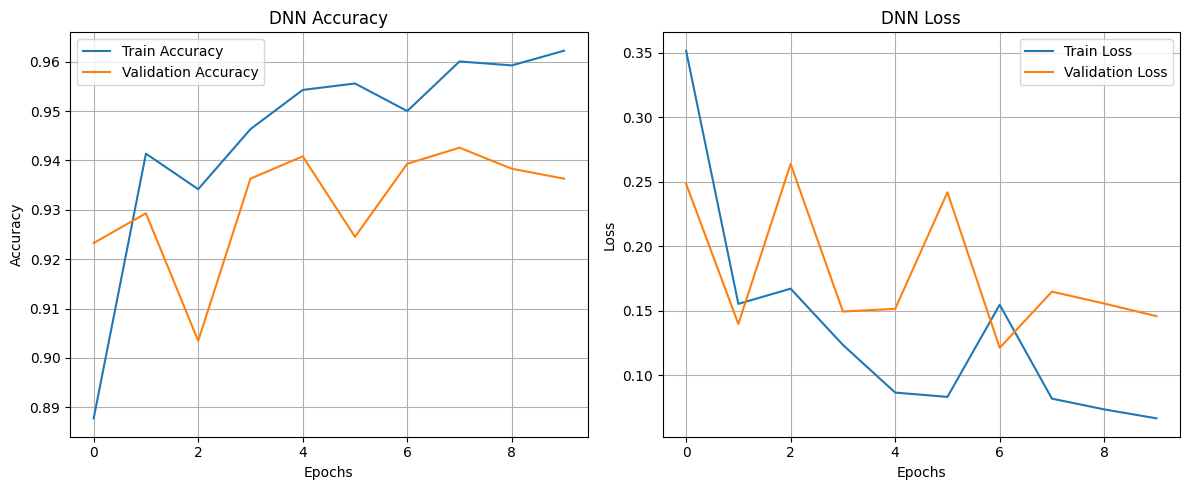


Random Forest Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2500
         1.0       0.99      0.94      0.97      2500

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

Random Forest tree visualization saved as 'random_forest_tree.png'.

SVM Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      2500
         1.0       0.94      0.96      0.95      2500

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

SVM conceptual visualization saved as 'svm_model.png'.

Logistic Regression Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      2500
 

/home/khansun/miniconda3/envs/eeg/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


157/157 [==============================] - 0s 2ms/step

LIME Explanation for DNN:



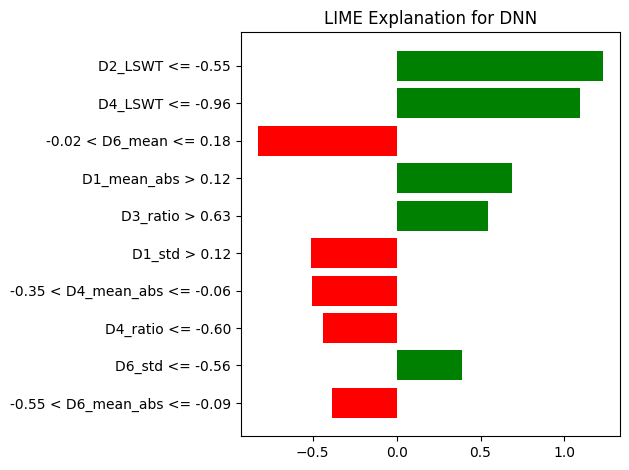

1/1 [==============================] - 0s 13ms/step
LIME explanation visualization saved as 'experiment/dnn_lime_explanation.png'

LIME Explanation for Random Forest:



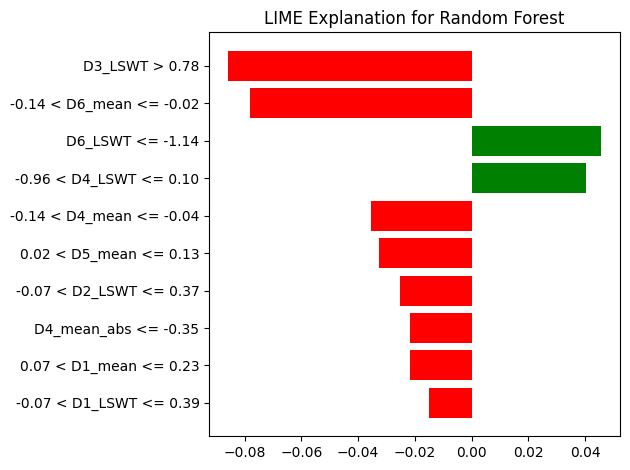

LIME explanation visualization saved as 'experiment/random_forest_lime_explanation.png'

LIME Explanation for SVM:



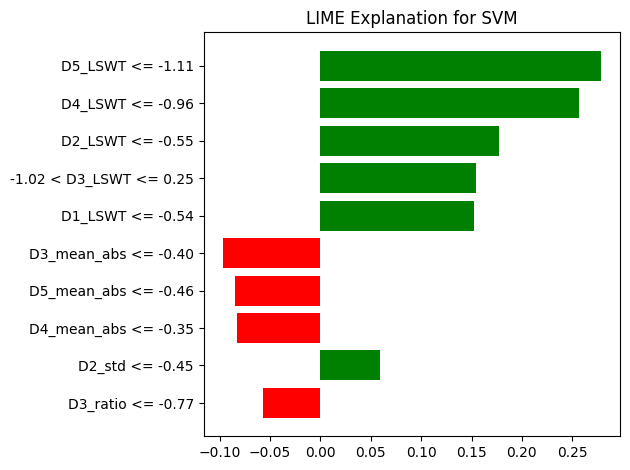

LIME explanation visualization saved as 'experiment/svm_lime_explanation.png'

LIME Explanation for Logistic Regression:



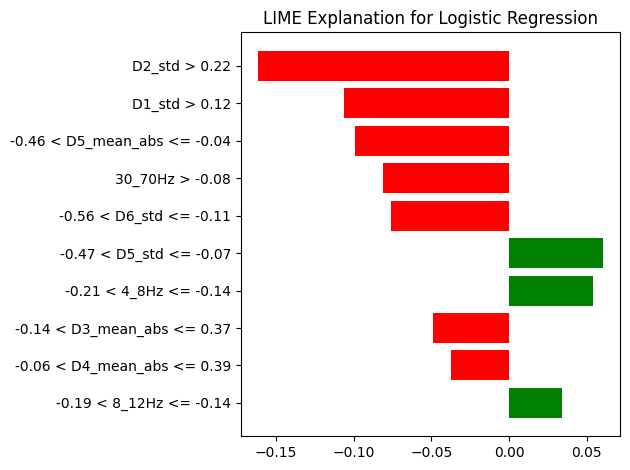

LIME explanation visualization saved as 'experiment/logistic_regression_lime_explanation.png'


In [8]:
results = run_pipeline(df, {
    "test_size": 0.2,
    "random_state": 42,
    "scaler": StandardScaler(),
    # Increased units to give more representation power
    "dnn_layers_units": [128, 64, 32],
    "dnn_activation": "relu",
    "dnn_optimizer": "adam",
    # Slightly more epochs for convergence
    "dnn_epochs": 10,
    "dnn_batch_size": 32,
    "dnn_verbose": 1,
}, balance=True)
